<div class="alert alert-block alert-success">
    <h2 align="center">Linear Regression - SLR</h2>
        <h3 align="center">Fariborz Dolafi</h3>

</div>

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

## Load dataset

In [2]:
# Import Dataset
from sklearn import datasets

# Load the dataset
diabetes = datasets.load_diabetes()


In [3]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [4]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

## Dataframe

In [5]:
# Initializing the Dataframe
data = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [6]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


In [7]:
#Adding target variable to dataframe
data['diabetesY'] = diabetes.target 


In [8]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetesY
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [9]:
data.shape

(442, 11)

In [10]:
 data.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'diabetesY'],
      dtype='object')

In [11]:
data.dtypes

age          float64
sex          float64
bmi          float64
bp           float64
s1           float64
s2           float64
s3           float64
s4           float64
s5           float64
s6           float64
diabetesY    float64
dtype: object

In [12]:
data.nunique()

age           58
sex            2
bmi          163
bp           100
s1           141
s2           302
s3            63
s4            66
s5           184
s6            56
diabetesY    214
dtype: int64

In [13]:
# Check for missing values
data.isnull().sum()

age          0
sex          0
bmi          0
bp           0
s1           0
s2           0
s3           0
s4           0
s5           0
s6           0
diabetesY    0
dtype: int64

In [14]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetesY
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


## Correlation

In [15]:
# Finding the correlation between the features
corr = data.corr()
corr.shape

(11, 11)

## Heatmap

<AxesSubplot:>

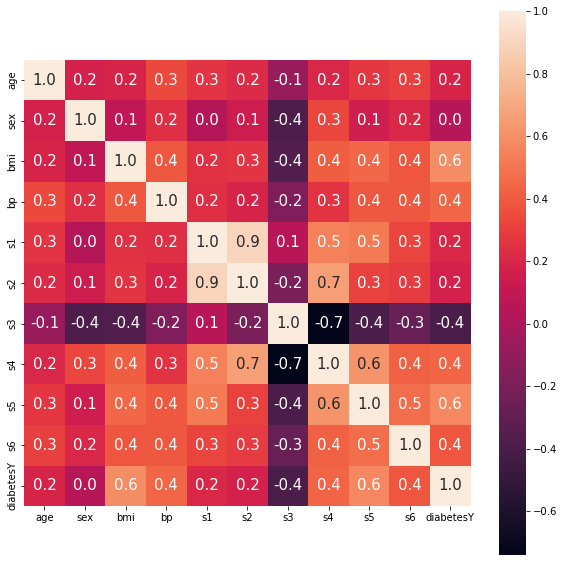

In [16]:
# Plotting the heatmap of correlation between features
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15})

<AxesSubplot:>

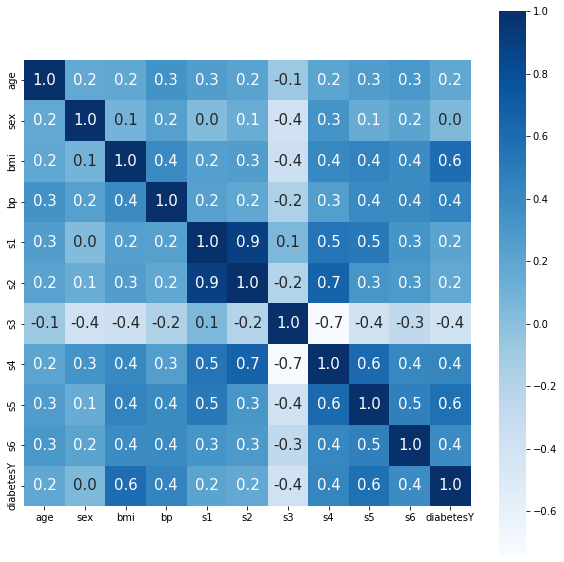

In [17]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')

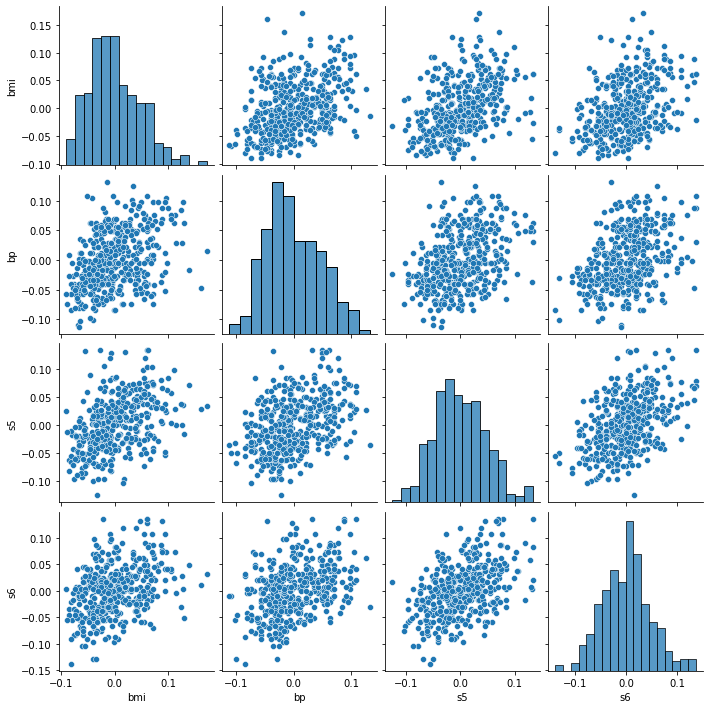

In [18]:
#Show more important features

sns.pairplot(data[['bmi', 'bp', 's5', 's6']])
plt.show();


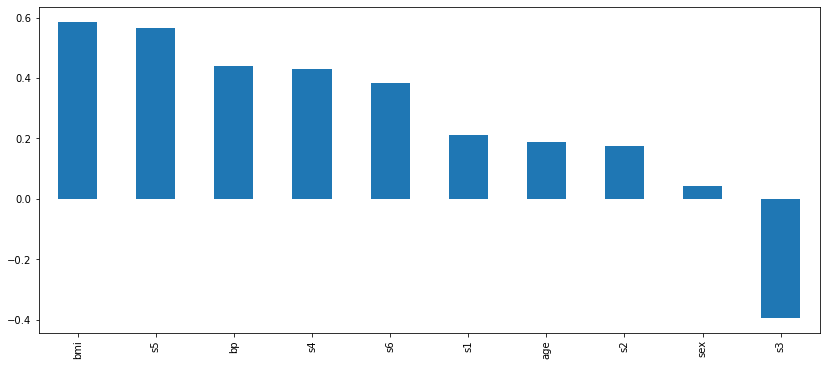

In [19]:
corr_with_diabetesY = data.corr()["diabetesY"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_diabetesY.drop("diabetesY").plot.bar()
plt.show();


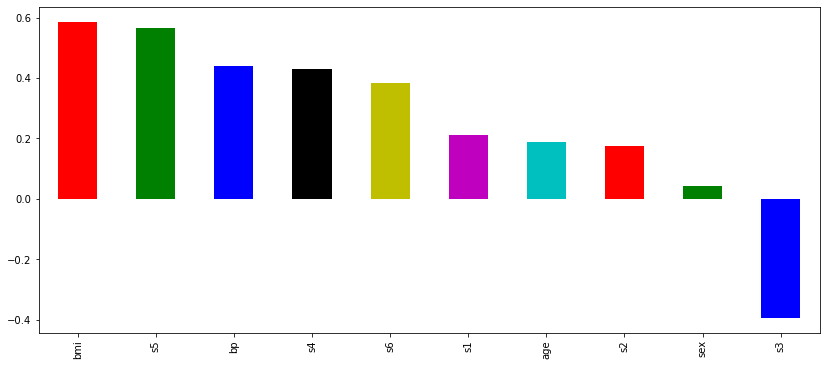

In [20]:
corr_with_diabetesY = data.corr()["diabetesY"].sort_values(ascending=False)
plt.figure(figsize=(14,6))
corr_with_diabetesY.drop("diabetesY").plot.bar(color = list('rgbkymc'))
plt.show();


## Simple Linear Regression

In [21]:
# Simple Linear Regression (SLR)

X = data[['bmi']]
y = data['diabetesY']


In [22]:
X

,bmi
0,0.061696
1,-0.051474
2,0.044451
3,-0.011595
4,-0.036385
...,...
437,0.019662
438,-0.015906
439,-0.015906
440,0.039062


In [23]:
y

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: diabetesY, Length: 442, dtype: float64

## Split Dataset with scikit-learn

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [25]:
X_train

,bmi
17,0.012117
66,-0.018062
137,0.049840
245,-0.035307
31,-0.065486
...,...
106,-0.076264
270,0.030440
348,-0.020218
435,-0.023451


In [26]:
X_test

,bmi
287,-0.006206
211,0.036907
72,-0.004050
321,0.051996
73,-0.020218
...,...
255,-0.065486
90,-0.025607
57,-0.063330
391,-0.069797


In [27]:
# Library for Linear Regression
from sklearn.linear_model import LinearRegression

# Create a Linear regressor
slr = LinearRegression()

# Train the model using the training sets 
slr.fit(X_train, y_train)

LinearRegression()

In [28]:
slr.intercept_

152.00335421448227

In [29]:
slr.coef_

array([998.57768914])

In [30]:
# Coefficient Values
coeffcients = pd.DataFrame([X_train.columns,slr.coef_]).T
coeffcients = coeffcients.rename(columns={0: 'Attribute', 1: 'Coefficients'})
coeffcients

,Attribute,Coefficients
0,bmi,998.577689


In [31]:
from sklearn import metrics

# Model prediction on test data
y_pred = slr.predict(X_test)

## Model Evaluation

In [32]:
print('R^2:',metrics.r2_score(y_test, y_pred))
print('MAE:',metrics.mean_absolute_error(y_test, y_pred))
print('MSE:',metrics.mean_squared_error(y_test, y_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

R^2: 0.23335039815872138
MAE: 52.259976445345536
MSE: 4061.8259284949268
RMSE: 63.73245584860925


## Visualizing Regression Model

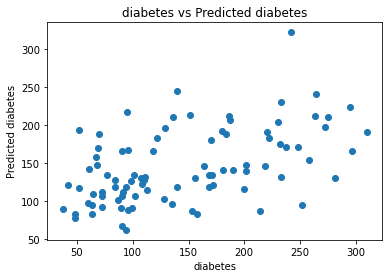

In [33]:
# Visualizing the differences between actual diabetes and predicted values
plt.scatter(y_test, y_pred)
plt.xlabel("diabetes")
plt.ylabel("Predicted diabetes")
plt.title("diabetes vs Predicted diabetes")
plt.show() 

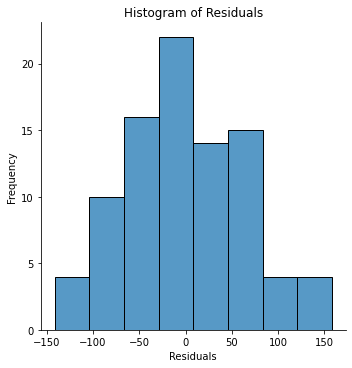

In [35]:
sns.displot(y_test-y_pred)
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

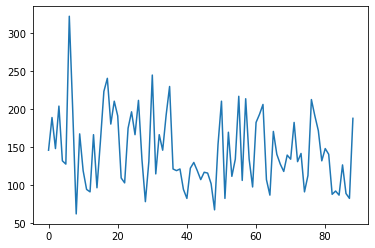

In [36]:
plt.plot(y_pred)

<AxesSubplot:xlabel='bmi', ylabel='diabetesY'>

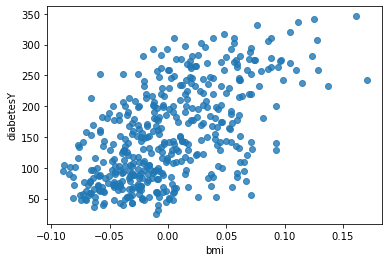

In [37]:
sns.regplot(x="bmi", y="diabetesY", data=data, fit_reg=False)

<AxesSubplot:xlabel='bmi', ylabel='diabetesY'>

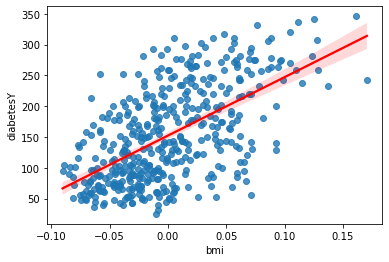

In [38]:
sns.regplot(x="bmi", y="diabetesY", data=data, line_kws={"color": "red"})

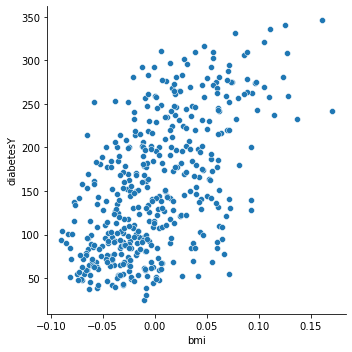

In [39]:
sns.relplot(x="bmi", y="diabetesY", data=data)

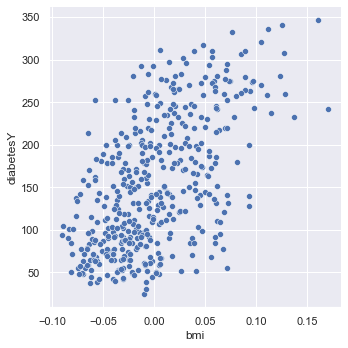

In [40]:
sns.set_theme(style="darkgrid")
sns.relplot(x="bmi", y="diabetesY", data=data)

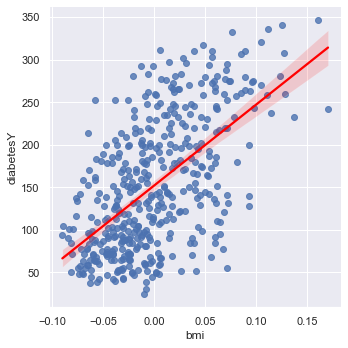

In [41]:
sns.lmplot(x="bmi", y="diabetesY", data=data, line_kws={"color": "red"})

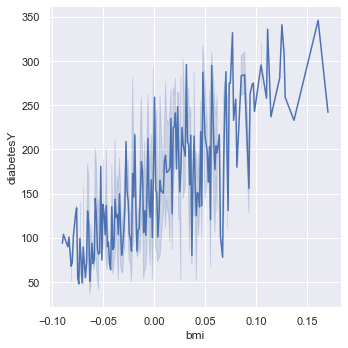

In [42]:
g = sns.relplot(x="bmi", y="diabetesY", kind="line", data=data)